In [66]:
#Data manipulation
import pandas as pd
import numpy as np

#Data visualisation
import matplotlib.pyplot as plt

#Warning
import warnings
warnings.filterwarnings("ignore")

#Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf

#Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#scipy
from scipy.cluster.vq import kmeans

In [2]:
pdf = pd.read_csv("../dataset/pdf_data.tsv")


In [3]:
pdf.drop(["Unnamed: 0"],axis=1, inplace=True)

In [4]:
pdf_no_nan = pdf["file_texts"].dropna()

In [5]:
pdf_clean = pdf_no_nan.replace(r"\n", ' ', regex=True).str.replace('\d+', ' ') 

In [39]:
vectorizer = tfidf(analyzer="word" ,stop_words="english", min_df=0.2, max_df=0.9, use_idf=True, smooth_idf=True)

In [55]:
pdf_matrix = vectorizer.fit_transform(pdf_clean)

In [58]:
X = pdf_matrix.todense()

In [130]:
words = vectorizer.get_feature_names()

In [127]:
#words = [word for word in words if len(word) < 10]

In [114]:
len(words)

429

In [115]:
words

['able',
 'accordance',
 'account',
 'accounting',
 'accounts',
 'accruals',
 'accuracy',
 'achievements',
 'act',
 'activities',
 'activity',
 'additional',
 'additions',
 'address',
 'administration',
 'administrative',
 'adopted',
 'affairs',
 'aid',
 'aims',
 'allocated',
 'amounts',
 'analysis',
 'annual',
 'applicable',
 'apply',
 'appointed',
 'appointment',
 'appropriate',
 'approved',
 'april',
 'area',
 'areas',
 'asset',
 'assets',
 'association',
 'attention',
 'audit',
 'auditor',
 'august',
 'available',
 'average',
 'balance',
 'bank',
 'bankers',
 'based',
 'basis',
 'behalf',
 'believe',
 'benefit',
 'benefits',
 'board',
 'body',
 'book',
 'brought',
 'building',
 'business',
 'capital',
 'care',
 'carried',
 'cash',
 'cause',
 'centre',
 'chair',
 'chairman',
 'charge',
 'charges',
 'charitable',
 'charities',
 'charity',
 'children',
 'come',
 'commission',
 'committee',
 'community',
 'companies',
 'company',
 'comply',
 'concern',
 'concerning',
 'connection',
 'c

# KMeans Tuning & Modeling

In [116]:
#hyperparameter tuning
n_clusters = 4
n_iters = 300
n_seed = 10

pca_num_components = 2
tsne_num_components = 2

In [117]:

model = KMeans(n_clusters=n_clusters,
               init="k-means++",
               max_iter=n_iters,
               n_init=1, 
               precompute_distances="auto",
               n_jobs=1)

In [118]:
model.fit(X)

KMeans(n_clusters=4, n_init=1, n_jobs=1, precompute_distances='auto')

In [119]:
labels = model.fit_predict(X)

In [120]:
labels

array([0, 3, 3, ..., 3, 3, 2], dtype=int32)

In [121]:
len(labels)

3240

In [122]:
centroids = model.cluster_centers_.argsort()[:,::1]

In [123]:
centroids

array([[153, 411, 196, ..., 146,  69, 427],
       [267, 178, 303, ...,  88, 273, 232],
       [ 46, 240, 150, ..., 205, 273, 100],
       [167, 243, 416, ..., 273, 206,  39]])

In [132]:
for i in range(n_clusters):
    print(f"Cluster {i}:")
    for ind in centroids[i,:3]:
        print(f"{words[ind]}")

Cluster 0:
fortheyearended
unitedkingdomgenerallyacceptedaccountingpractice
independentexaminer
Cluster 1:
opinion
hand
provide
Cluster 2:
basis
member
following
Cluster 3:
gives
methods
useful


In [96]:
reduced_data = PCA(n_components = pca_num_components).fit_transform(X)

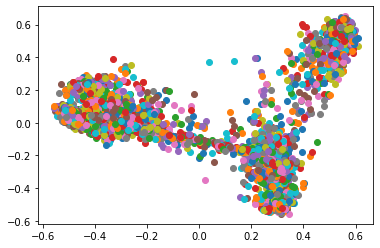

In [80]:
fig,ax = plt.subplots()
for i, instance in enumerate(reduced_data):
    pca_comp1,pca_comp2 = reduced_data[i]
    ax.scatter(pca_comp1,pca_comp2)
plt.show()